### Import:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

### Data Loading:

In [10]:
df = pd.read_csv("data/WB_data.csv")

In [11]:
df.describe()

,1970 [YR1970],1980 [YR1980],1990 [YR1990],2000 [YR2000],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
count,6.710000e+02,9.270000e+02,9.800000e+02,1.482000e+03,1.571000e+03,1.595000e+03,1.615000e+03,1.593000e+03,1.592000e+03,1.597000e+03,1.606000e+03,1.544000e+03,1.379000e+03,1.258000e+03,1.237000e+03,1.188000e+03
mean,3.262905e+10,9.158516e+10,1.730646e+11,1.685690e+11,3.406881e+11,3.768205e+11,3.817261e+11,4.010344e+11,4.134056e+11,3.875995e+11,3.907121e+11,4.350703e+11,5.184324e+11,5.769903e+11,5.699084e+11,6.804057e+11
std,2.198046e+11,7.038301e+11,1.399167e+12,1.662279e+12,3.029257e+12,3.331933e+12,3.375555e+12,3.498970e+12,3.596341e+12,3.396503e+12,3.444202e+12,3.738388e+12,4.207742e+12,4.467781e+12,4.396182e+12,5.116398e+12
min,1.458090e+00,9.376000e-01,1.040710e+00,1.012180e+00,1.117610e+00,8.503200e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.465560e+00,1.370930e+00,1.271740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.007720e+05,9.535365e+01,9.849570e+01,3.753833e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.100000e+01,1.000000e+01,9.604120e+00,9.000000e+00,9.000000e+00
50%,1.499688e+07,4.508992e+06,1.004856e+07,1.112313e+02,1.063555e+02,1.053610e+02,1.023368e+02,1.035661e+02,1.041613e+02,1.032811e+02,1.032213e+02,1.046443e+02,9.676200e+04,3.142034e+06,3.555868e+06,5.846270e+06
75%,5.179353e+08,5.737343e+08,1.385093e+09,3.179544e+08,5.384946e+08,5.624135e+08,5.375517e+08,5.927845e+08,6.333549e+08,5.442156e+08,5.260422e+08,8.435400e+08,1.409862e+09,2.308294e+09,2.326721e+09,2.917843e+09
max,3.001560e+12,1.141916e+13,2.282261e+13,3.383939e+13,6.651417e+13,7.395779e+13,7.560398e+13,7.775137e+13,7.989439e+13,7.535966e+13,7.658803e+13,8.155096e+13,8.668687e+13,8.794557e+13,8.557772e+13,9.752703e+13


In [12]:
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1970 [YR1970]', '1980 [YR1980]', '1990 [YR1990]', '2000 [YR2000]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    2128 non-null   object 
 1   Series Code    2128 non-null   object 
 2   Country Name   2128 non-null   object 
 3   Country Code   2128 non-null   object 
 4   1970 [YR1970]  671 non-null    float64
 5   1980 [YR1980]  927 non-null    float64
 6   1990 [YR1990]  980 non-null    float64
 7   2000 [YR2000]  1482 non-null   float64
 8   2010 [YR2010]  1571 non-null   float64
 9   2011 [YR2011]  1595 non-null   float64
 10  2012 [YR2012]  1615 non-null   float64
 11  2013 [YR2013]  1593 non-null   float64
 12  2014 [YR2014]  1592 non-null   float64
 13  2015 [YR2015]  1597 non-null   float64
 14  2016 [YR2016]  1606 non-null   float64
 15  2017 [YR2017]  1544 non-null   float64
 16  2018 [YR2018]  1379 non-null   float64
 17  2019 [YR2019]  1258 non-null   float64
 18  2020 [YR

### Data wrangling:

In [14]:
#Creation of a header dictionary, to rename the years columns.
header_dict = {k: int(k[:4]) for k in df.columns.to_list()[4:]}
df = df.rename(header_dict, axis=1)

In [15]:
# Show the renamed columns
df.columns

Index([ 'Series Name',  'Series Code', 'Country Name', 'Country Code',
                 1970,           1980,           1990,           2000,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020,           2021],
      dtype='object')

In [16]:
# Bring data into a coherent long format
df_t=df.melt(id_vars=df.columns.to_list()[:4])
df_t

,Series Name,Series Code,Country Name,Country Code,variable,value
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,1970,10752971.0
1,"Population, total",SP.POP.TOTL,Albania,ALB,1970,2135479.0
2,"Population, total",SP.POP.TOTL,Algeria,DZA,1970,13795915.0
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,1970,27075.0
4,"Population, total",SP.POP.TOTL,Andorra,AND,1970,19860.0
...,...,...,...,...,...,...
34043,"Compulsory education, duration (years)",SE.COM.DURS,Sub-Saharan Africa,SSF,2021,8.0
34044,"Compulsory education, duration (years)",SE.COM.DURS,Sub-Saharan Africa (excluding high income),SSA,2021,8.0
34045,"Compulsory education, duration (years)",SE.COM.DURS,Sub-Saharan Africa (IDA & IBRD countries),TSS,2021,8.0
34046,"Compulsory education, duration (years)",SE.COM.DURS,Upper middle income,UMC,2021,10.0


In [17]:
# Get data into a usable wide format
df_t1=df_t.pivot(columns="Series Name", index=["Country Code", "variable"], values="value").reset_index()
df_t1

Series Name,Country Code,variable,Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)",GDP (current US$),"Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
0,ABW,1970,NaN,NaN,NaN,NaN,NaN,NaN,59106.0,NaN
1,ABW,1980,NaN,NaN,NaN,NaN,NaN,NaN,62267.0,NaN
2,ABW,1990,3.591697e+07,NaN,7.648045e+08,NaN,NaN,NaN,65712.0,NaN
3,ABW,2000,7.572675e+07,NaN,1.873453e+09,4.71536,106.07735,95.905182,89101.0,NaN
4,ABW,2010,1.522222e+08,NaN,2.453597e+09,6.75099,101.15607,NaN,100341.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4251,ZWE,2017,2.978407e+08,7.0,1.758489e+10,5.81878,NaN,90.340347,14751101.0,NaN
4252,ZWE,2018,6.387594e+08,7.0,3.415607e+10,2.05049,NaN,92.572067,15052184.0,NaN
4253,ZWE,2019,4.104177e+08,7.0,2.183223e+10,NaN,NaN,92.934624,15354608.0,NaN
4254,ZWE,2020,4.017035e+08,7.0,2.150970e+10,NaN,NaN,NaN,15669666.0,NaN


### Excluding Regional grouped data from df_t1

In [18]:
# Get the unique regional values (start from row 2017)
excl_list=list(df[df["Series Code"] == "SP.POP.TOTL"][217:]["Country Code"])
# Exclude the identified regional groups
df_t1=df_t1[~df_t1["Country Code"].isin(excl_list)]

## Ploting

In [19]:
# Prepare data for plotting
df_plot = df_t1.copy().T
# Set country codes as column headers
df_plot.columns = df_plot.iloc[0]
# Drop row of country codes
df_plot = df_plot.drop(["Country Code","variable"])

### Missing values

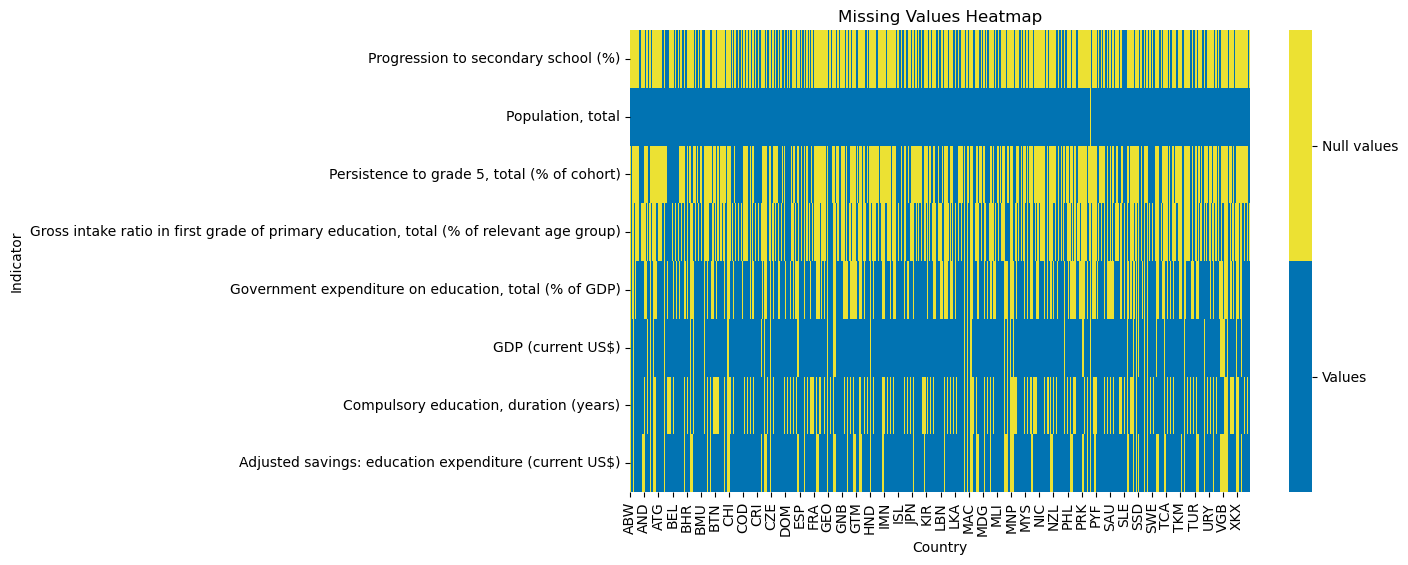

In [20]:
# Plot the actual figure
plt.figure(figsize=(10, 6))
# Generate a color map for binary classification (True vs False)
colors = (sns.color_palette("colorblind")[0], sns.color_palette("colorblind")[8])
cmap = LinearSegmentedColormap.from_list("Binary", colors, len(colors))
ax = sns.heatmap(df_plot.isnull(), cmap=cmap)
plt.title('Missing Values Heatmap')

# Manually changing the colorbar after it's generation
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Values', 'Null values'])

# X - Y axis labels
ax.set_ylabel('Indicator')
ax.set_xlabel('Country')
ax.invert_yaxis()

plt.show()

In [21]:
# Count NAs across dataframe
df_t1.isna().sum()

Series Name
Country Code                                                                                  0
variable                                                                                      0
Adjusted savings: education expenditure (current US$)                                       625
Compulsory education, duration (years)                                                      968
GDP (current US$)                                                                           261
Government expenditure on education, total (% of GDP)                                      1290
Gross intake ratio in first grade of primary education, total (% of relevant age group)    1919
Persistence to grade 5, total (% of cohort)                                                2253
Population, total                                                                             2
Progression to secondary school (%)                                                        2429
dtype: int64

In [22]:
# Show NULLs by year
nulls = df_t1.copy()
nulls = nulls.set_index("variable").iloc[:,1:].isnull()
nulls.groupby(["variable"]).sum()


Series Name,Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)",GDP (current US$),"Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
variable,,,,,,,,
1970,104,217,76,188,202,200,1,208
1980,85,216,62,155,139,151,1,164
1990,61,216,29,168,140,160,0,176
2000,33,53,14,98,79,138,0,117
2010,29,27,7,71,70,128,0,109
2011,27,26,4,67,71,123,0,104
2012,28,26,6,56,68,115,0,103
2013,27,24,6,56,72,130,0,107
2014,26,24,5,52,71,137,0,106


### Correlations

In [23]:
# Calculate an actual correlation matrix
corr = df_t1.iloc[:,2:].corr()
# Plot with pandas inbuilt plotting function
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Series Name,Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)",GDP (current US$),"Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
Series Name,,,,,,,,
Adjusted savings: education expenditure (current US$),1.00,0.12,0.95,0.08,-0.03,0.09,0.34,0.14
"Compulsory education, duration (years)",0.12,1.00,0.09,0.15,-0.23,0.25,-0.04,0.28
GDP (current US$),0.95,0.09,1.00,0.04,-0.02,0.08,0.52,0.13
"Government expenditure on education, total (% of GDP)",0.08,0.15,0.04,1.00,-0.08,0.31,-0.06,0.22
"Gross intake ratio in first grade of primary education, total (% of relevant age group)",-0.03,-0.23,-0.02,-0.08,1.00,-0.35,0.02,-0.03
"Persistence to grade 5, total (% of cohort)",0.09,0.25,0.08,0.31,-0.35,1.00,0.02,0.53
"Population, total",0.34,-0.04,0.52,-0.06,0.02,0.02,1.00,-0.01
Progression to secondary school (%),0.14,0.28,0.13,0.22,-0.03,0.53,-0.01,1.00


##### Correlation without NULLs

In [24]:
# Calculate an actual correlation matrix
df_t2 = df_t1[(df_t1["variable"] >= 2000) & (df_t1["variable"] <= 2017)]
corr = df_t2.dropna().iloc[:,2:].corr()
# Plot with pandas inbuilt plotting function
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Series Name,Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)",GDP (current US$),"Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
Series Name,,,,,,,,
Adjusted savings: education expenditure (current US$),1.00,0.17,0.97,0.12,-0.14,0.26,0.39,0.27
"Compulsory education, duration (years)",0.17,1.00,0.15,0.13,-0.33,0.25,-0.03,0.31
GDP (current US$),0.97,0.15,1.00,0.03,-0.13,0.22,0.52,0.23
"Government expenditure on education, total (% of GDP)",0.12,0.13,0.03,1.00,-0.19,0.37,-0.08,0.35
"Gross intake ratio in first grade of primary education, total (% of relevant age group)",-0.14,-0.33,-0.13,-0.19,1.00,-0.56,-0.01,-0.30
"Persistence to grade 5, total (% of cohort)",0.26,0.25,0.22,0.37,-0.56,1.00,-0.02,0.56
"Population, total",0.39,-0.03,0.52,-0.08,-0.01,-0.02,1.00,-0.03
Progression to secondary school (%),0.27,0.31,0.23,0.35,-0.30,0.56,-0.03,1.00


## Alternative to get WB data

In [116]:
import wbgapi as wb


In [117]:
df_wb = wb.data.DataFrame(series=['SP.POP.TOTL', 'NY.ADJ.AEDU.CD', 'SE.XPD.TOTL.GD.ZS','SE.SEC.PROG.ZS', 'SE.PRM.PRS5.ZS', 'SE.PRM.GINT.ZS', "NY.GDP.MKTP.CD"], time=range(1990, 2021))

In [109]:
df["Series Code"].unique()

array(['SP.POP.TOTL', 'NY.ADJ.AEDU.CD', 'SE.XPD.TOTL.GD.ZS',
       'SE.SEC.PROG.ZS', 'SE.PRM.PRS5.ZS', 'SE.PRM.GINT.ZS'], dtype=object)